The Anscombe's quartet example problem. Anscombe's quartet was constructed in 1973 by statistician Francis Anscombe to illustrate the importance of plotting data before you analyze it and build your model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats

import phik

Import data

In [2]:
df2=pd.read_csv("dataset2.csv")
df2=df2.drop(['Unnamed: 0'], axis=1)
df2.head(2)

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76


In [3]:
df2.describe()

,x1,y1,x2,y2,x3,y3,x4,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


Note: Mean and standard deviation are similar across the four dataset

In [4]:
#Training models for all four different datasets and storing the results in a table
import statsmodels.formula.api as smf 
table=[]
#dataset1
m=smf.ols(formula="y1~1+x1", data=df2).fit()
y_hat=m.predict(df2.x1)
dic={"dataset":1,
"r-squared":m.rsquared,
"intercept":m.params[0],
"coeff":m.params[1],
"y_pred":y_hat,
}
table.append(dic)
#dataset2
m=smf.ols(formula="y2~1+x2", data=df2).fit()
y_hat=m.predict(df2.x2)
dic={"dataset":2,
"r-squared":m.rsquared,
"intercept":m.params[0],
"coeff":m.params[1],
"y_pred":y_hat,
}
table.append(dic)
#dataset3
m=smf.ols(formula="y3~1+x3", data=df2).fit()
y_hat=m.predict(df2.x3)
dic={"dataset":3,
"r-squared":m.rsquared,
"intercept":m.params[0],
"coeff":m.params[1],
"y_pred":y_hat,
}
table.append(dic)
#dataset4
m=smf.ols(formula="y4~1+x4", data=df2).fit()
y_hat=m.predict(df2.x4)
dic={"dataset":4,
"r-squared":m.rsquared,
"intercept":m.params[0],
"coeff":m.params[1],
"y_pred":y_hat,
}
table.append(dic)




In [5]:
Models=pd.DataFrame(table)
Models

,dataset,r-squared,intercept,coeff,y_pred
0,1,0.666542,3.000091,0.500091,0 8.001000 1 7.000818 2 9.50127...
1,2,0.666242,3.000909,0.500000,0 8.000909 1 7.000909 2 9.50090...
2,3,0.666324,3.002455,0.499727,0 7.999727 1 7.000273 2 9.498909 3...
3,4,0.666707,3.001727,0.499909,0 7.001 1 7.001 2 7.001 3 ...


Note: The results from the models are similar. Now we will plot it to see if there is still some difference.

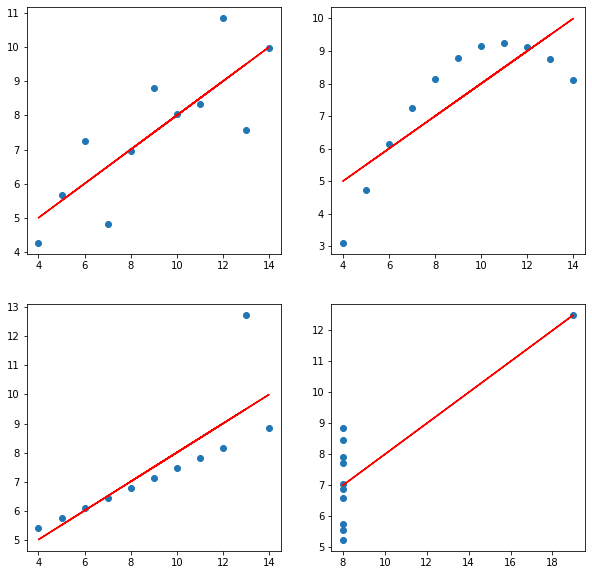

In [6]:
fig, ax=plt.subplots(2,2, figsize=(10,10))
ax[0,0].scatter(df2.x1,df2.y1)
ax[0,0].plot(df2.x1,Models.loc[0,'y_pred'], color='red')
#
ax[0,1].scatter(df2.x2,df2.y2)
ax[0,1].plot(df2.x2,Models.loc[1,'y_pred'], color='red')
#
ax[1,0].scatter(df2.x3,df2.y3)
ax[1,0].plot(df2.x3,Models.loc[2,'y_pred'], color='red')
#
ax[1,1].scatter(df2.x4,df2.y4)
ax[1,1].plot(df2.x4,Models.loc[3,'y_pred'], color='red')

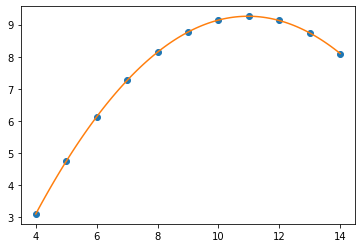

In [7]:
order=2
p=np.poly1d(np.polyfit(df2.x2, df2.y2, order))
p_x2 = np.linspace(4, 14, 100)
plt.plot(df2.x2,df2.y2, 'o', p_x2,p(p_x2), '-')

Outlier detection

In [8]:
#Z-score outlier detection
mean = np.mean(df2.y3)
std = np.std(df2.y3)
threshold = 2
outlier = []
for i in df2.y3:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [12.74]


In [9]:
criteria=(df2.y3==outlier[0])
outlier_=df2[criteria]
outlier_[['x3','y3']]

,x3,y3
2,13.0,12.74


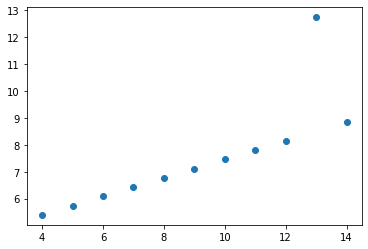

In [10]:
dff2=df2[~criteria]
plt.scatter(df2.x3,df2.y3)

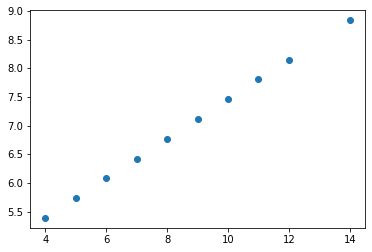

In [11]:
plt.scatter(dff2.x3,dff2.y3)

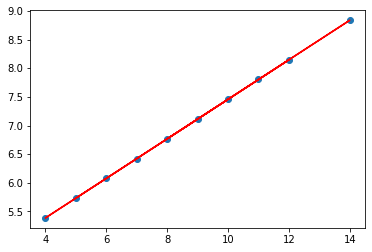

In [12]:
m=smf.ols(formula="y3~1+x3", data=dff2).fit()
y_hat=m.predict(dff2.x3)
#
ax=plt.scatter(dff2.x3,dff2.y3)
plt.plot(dff2.x3,y_hat, color='red')

The above example successfully demonstrates the Anscombe's quartet